# Predict 👔 Employee absenteeism 💼 from work 🏭

# 💼Employee Absenteeism

---

## 🎯 Purpose of the task:
> - Based on information we predict whether an employee is expected to be absent or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 💾 The dataset

In [2]:
Data = pd.read_csv(r'C:\Users\98918\Desktop\Employee absenteeism\Absenteeism_data.csv')
Data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,36,0,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,3,23,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,7,7,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,11,23,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,5/23/2021,179,22,40,237.656,22,2,2,0,8
696,28,6,5/23/2021,225,26,28,237.656,24,1,1,2,3
697,18,10,5/24/2021,330,16,28,237.656,25,2,0,0,8
698,25,23,5/24/2021,235,16,32,237.656,25,3,0,0,2


In [3]:
Data.shape

(700, 12)

In [4]:
df = Data.copy()
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,36,0,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,3,23,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,7,7,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,11,23,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,5/23/2021,179,22,40,237.656,22,2,2,0,8
696,28,6,5/23/2021,225,26,28,237.656,24,1,1,2,3
697,18,10,5/24/2021,330,16,28,237.656,25,2,0,0,8
698,25,23,5/24/2021,235,16,32,237.656,25,3,0,0,2


# 📊  Exploratory Data Analysis (EDA) & Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    700 non-null    int64  
 1   Reason for Absence                    700 non-null    int64  
 2   Date                                  700 non-null    object 
 3   Transportation Expense                700 non-null    int64  
 4   Distance to Work                      700 non-null    int64  
 5   Age                                   700 non-null    int64  
 6   Daily Work Load Average(in Minutes)   700 non-null    float64
 7   Body Mass Index                       700 non-null    int64  
 8   Education                             700 non-null    int64  
 9   Children                              700 non-null    int64  
 10  Pets                                  700 non-null    int64  
 11  Absenteeism Time in

In [6]:
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average(in Minutes) ',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'],
      dtype='object')

In [7]:
for column in df.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")

===============Column: ID==============
Number of unique values: 34
Max: 36
Min: 1
===============Column: Reason for Absence==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: Date==============
Number of unique values: 432
Max: 9/9/2019
Min: 1/1/2021
===============Column: Transportation Expense==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: Distance to Work==============
Number of unique values: 24
Max: 52
Min: 5
===============Column: Age==============
Number of unique values: 21
Max: 58
Min: 27
===============Column: Daily Work Load Average(in Minutes) ==============
Number of unique values: 35
Max: 378.884
Min: 205.917
===============Column: Body Mass Index==============
Number of unique values: 16
Max: 38
Min: 19
===============Column: Education==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Children==============
Number of unique values: 5
Max: 4
Min: 0
===============Column: Pets====

## ID: individual identification (34 employees) indicates precisely who has been away during working hours. Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

### So we are going to drop this column

In [8]:
df = df.drop(['ID'], axis = 1)
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,0,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,23,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,7,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,23,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,5/23/2021,179,22,40,237.656,22,2,2,0,8
696,6,5/23/2021,225,26,28,237.656,24,1,1,2,3
697,10,5/24/2021,330,16,28,237.656,25,2,0,0,8
698,23,5/24/2021,235,16,32,237.656,25,3,0,0,2


In [9]:
pd.unique(df['Reason for Absence'])

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [10]:
df['Reason for Absence'].value_counts()

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
21      6
6       6
8       5
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for Absence, dtype: int64

In [11]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
reason_columns['check'].sum(axis=0)

700

In [14]:
reason_columns['check'].unique()

array([1], dtype=int64)

In [15]:
reason_columns = reason_columns.drop(['check'], axis = 1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)

In [17]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average(in Minutes) ',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [19]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [20]:
df=df.drop(['Reason for Absence'], axis=1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,5/23/2021,179,22,40,237.656,22,2,2,0,8
696,5/23/2021,225,26,28,237.656,24,1,1,2,3
697,5/24/2021,330,16,28,237.656,25,2,0,0,8
698,5/24/2021,235,16,32,237.656,25,3,0,0,2


In [21]:
reason_type1 = reason_columns.loc[:,1:14].max(axis=1)
reason_type2 = reason_columns.loc[:,15:17].max(axis=1)
reason_type3 = reason_columns.loc[:,18:22].max(axis=1)
reason_type4 = reason_columns.loc[:,23:].max(axis=1)

In [22]:
reason_type4

0      1
1      0
2      1
3      0
4      1
      ..
695    0
696    0
697    0
698    1
699    1
Length: 700, dtype: uint8

In [23]:
df =pd.concat([df, reason_type1, reason_type2, reason_type3, reason_type4], axis =1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,7/7/2018,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,7/14/2018,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,7/15/2018,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7/16/2018,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,7/23/2018,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [24]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1,
       2, 3], dtype=object)

In [25]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
                'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
                'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
                'Reason1','Reason2','Reason3','Reason4']

In [26]:
df.columns =column_names
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason1,Reason2,Reason3,Reason4
0,7/7/2018,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,7/14/2018,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,7/15/2018,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7/16/2018,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,7/23/2018,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,5/23/2021,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,5/23/2021,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,5/24/2021,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,5/24/2021,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [27]:
reordered_columns = ['Reason1','Reason2','Reason3','Reason4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
                     'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
                     'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [28]:
df = df[reordered_columns]
df

,Reason1,Reason2,Reason3,Reason4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5/23/2021,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5/23/2021,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5/24/2021,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5/24/2021,235,16,32,237.656,25,3,0,0,2


# ✔️Creating a checkpoint

In [29]:
df_reason_modified = df.copy()
df_reason_modified.head(20)

,Reason1,Reason2,Reason3,Reason4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7/7/2018,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7/14/2018,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7/15/2018,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7/16/2018,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7/23/2018,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1,0,0,0,7/17/2018,246,25,41,239.554,23,1,0,0,8
16,0,0,0,1,7/17/2018,179,51,38,239.554,31,1,0,0,2
17,0,0,1,0,7/27/2018,179,51,38,239.554,31,1,0,0,8
18,1,0,0,0,7/30/2018,189,29,33,239.554,25,1,2,2,8


In [30]:
type(df_reason_modified['Date'][0])

str

In [31]:
df_reason_modified['Date'] = pd.to_datetime(df_reason_modified['Date'])
df_reason_modified['Date'].head()

0   2018-07-07
1   2018-07-14
2   2018-07-15
3   2018-07-16
4   2018-07-23
Name: Date, dtype: datetime64[ns]

In [32]:
type(df_reason_modified['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
df_reason_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Reason1                               700 non-null    uint8         
 1   Reason2                               700 non-null    uint8         
 2   Reason3                               700 non-null    uint8         
 3   Reason4                               700 non-null    uint8         
 4   Date                                  700 non-null    datetime64[ns]
 5   Transportation Expense                700 non-null    int64         
 6   Distance to Work                      700 non-null    int64         
 7   Age                                   700 non-null    int64         
 8   Daily Work Load Average(in Minutes)   700 non-null    float64       
 9   Body Mass Index                       700 non-null    int64         
 10  Ed

## Extracting Month and Day

In [34]:
list_months = []
for i in range(df_reason_modified.shape[0]):
    list_months.append(df_reason_modified['Date'][i].month)

In [35]:
list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [36]:
len(list_months)

700

In [37]:
df_reason_modified['Month Value'] = list_months
df_reason_modified.head()

,Reason1,Reason2,Reason3,Reason4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2018-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2018-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2018-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2018-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2018-07-23,289,36,33,239.554,30,1,2,1,2,7


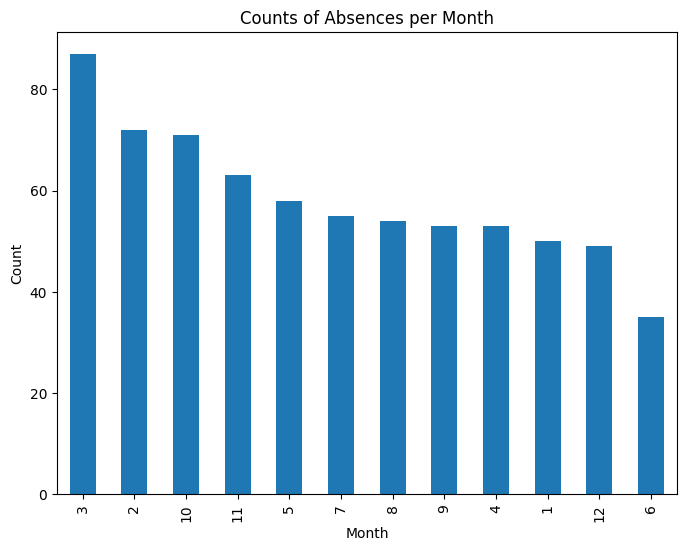

In [38]:
value_counts = df_reason_modified['Month Value'].value_counts()

plt.figure(figsize=(8, 6))  # Define the size of the plot

# Create a bar plot
value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Absences per Month')

# Show the plot
plt.show()

In [39]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [40]:
df_reason_modified['Day of the Week'] = df_reason_modified['Date'].apply(date_to_weekday)

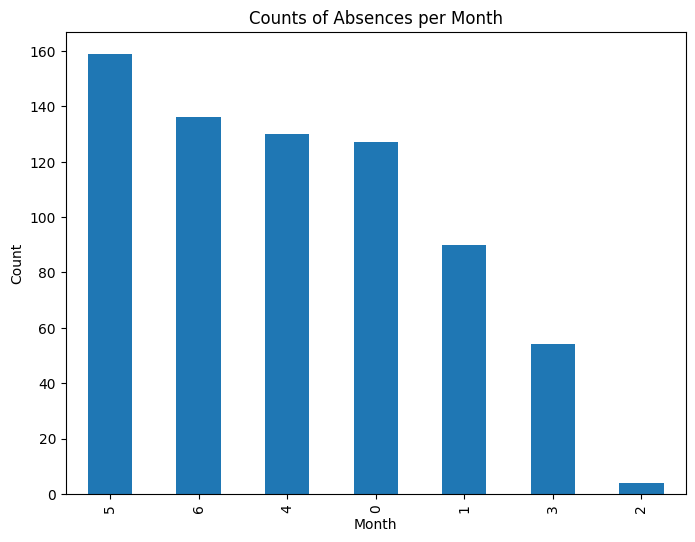

In [41]:
value_counts = df_reason_modified['Day of the Week'].value_counts()

plt.figure(figsize=(8, 6))  # Define the size of the plot

# Create a bar plot
value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Absences per Month')

# Show the plot
plt.show()

In [42]:
df_reason_modified.head()

,Reason1,Reason2,Reason3,Reason4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2018-07-07,289,36,33,239.554,30,1,2,1,4,7,5
1,0,0,0,0,2018-07-14,118,13,50,239.554,31,1,1,0,0,7,5
2,0,0,0,1,2018-07-15,179,51,38,239.554,31,1,0,0,2,7,6
3,1,0,0,0,2018-07-16,279,5,39,239.554,24,1,2,0,4,7,0
4,0,0,0,1,2018-07-23,289,36,33,239.554,30,1,2,1,2,7,0


In [43]:
df_reason_modified = df_reason_modified.drop(['Date'], axis = 1)

df_reason_modified.head()

,Reason1,Reason2,Reason3,Reason4,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,5
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,5
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,6
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,0
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,0


In [44]:
df_reason_modified.columns.values

array(['Reason1', 'Reason2', 'Reason3', 'Reason4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average(in Minutes) ', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
       'Month Value', 'Day of the Week'], dtype=object)

In [45]:
column_names_new = ['Reason1', 'Reason2', 'Reason3', 'Reason4', 'Month Value', 'Day of the Week',
                    'Transportation Expense', 'Distance to Work', 'Age',
                    'Daily Work Load Average(in Minutes) ', 'Body Mass Index', 'Education', 'Children',
                    'Pets', 'Absenteeism Time in Hours']

In [46]:
df_reason_modified = df_reason_modified[column_names_new]
df_reason_modified.head()

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,1,2,1,2


In [47]:
df_reason_date_modified = df_reason_modified.copy()
df_reason_date_modified.head()

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,1,2,1,2


In [48]:
df_reason_date_modified.head()

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,1,2,1,2


## Education column

In [49]:
df_reason_date_modified

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,6,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,6,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,0,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,0,235,16,32,237.656,25,3,0,0,2


In [50]:
df_reason_date_modified['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [51]:
df_reason_date_modified['Education'] = df_reason_date_modified['Education'].map({1:0, 2:1, 3:1, 4:1})

In [52]:
df_reason_date_modified['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [53]:
df_reason_date_modified.head(10)

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,0,2,1,2
5,0,0,0,1,7,1,179,51,38,239.554,31,0,0,0,2
6,0,0,1,0,7,1,361,52,28,239.554,27,0,1,4,8
7,0,0,0,1,7,1,260,50,36,239.554,23,0,4,0,4
8,0,0,1,0,7,4,155,12,34,239.554,25,0,2,0,40
9,0,0,1,0,7,4,235,11,37,239.554,29,1,1,1,8


In [54]:
df_reason_date_modified.Education.isna().sum()

0

## Final Checkpoint and exporting our preprocessed dataset

In [56]:
df_preprocessed = df_reason_date_modified.copy()

df_preprocessed.head()

,Reason1,Reason2,Reason3,Reason4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average(in Minutes),Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,5,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,5,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,6,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,0,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,0,289,36,33,239.554,30,0,2,1,2


In [57]:
df_preprocessed.to_csv(r'C:\Users\98918\Desktop\Employee absenteeism\Final_Absenteeism_preprocessed.csv', index = False)